## Code từ file gốc:

In [1]:
# Cài đặt thư viện
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Đặt seed để kết quả ổn định hơn (tùy chọn)
torch.manual_seed(42)
np.random.seed(42)

In [2]:
# Tạo điểm cho lớp 0 (vòng tròn)
def generate_class_0(n_samples):
    u = np.random.rand(n_samples)
    theta = 2 * np.pi * np.random.rand(n_samples)
    r = np.sqrt(u)  # Bán kính nhỏ
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    return np.column_stack((x, y))

# Tạo điểm cho lớp 1 (vành đai)
def generate_class_1(n_samples):
    u = np.random.rand(n_samples)
    theta = 2 * np.pi * np.random.rand(n_samples)
    r = np.sqrt(3 * u + 1)  # Bán kính lớn hơn
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    return np.column_stack((x, y))

# Tạo dữ liệu
X_class0 = generate_class_0(100)
X_class1 = generate_class_1(200)
y_class0 = np.zeros(100)  # Nhãn 0
y_class1 = np.ones(200)  # Nhãn 1

# Kết hợp dữ liệu
X = np.vstack((X_class0, X_class1))
y = np.hstack((y_class0, y_class1))

# Chia dữ liệu với 20% là test size
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [3]:
# Chia dữ liệu với 20% là test size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Chuyển sang tensor PyTorch
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)


In [4]:
# Xây dựng mô hình ANN cơ bản 
class ANN(nn.Module):
    def __init__(self):
        super(ANN, self).__init__()
        self.fc1 = nn.Linear(2, 4)  # Đầu vào 2, ẩn 4
        self.relu = nn.ReLU()       # Công tắc ReLU
        self.fc2 = nn.Linear(4, 1)  # Ẩn 4, đầu ra 1
        self.sigmoid = nn.Sigmoid() # Xác suất 0-1

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.sigmoid(x)
        return x

# Khởi tạo mô hình
model = ANN()

# Định nghĩa mất mát và tối ưu hóa
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Huấn luyện
epochs = 100
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()        # Xóa gradient cũ
    outputs = model(X_train)     # Dự đoán
    loss = criterion(outputs, y_train)  # Tính sai lầm
    loss.backward()              # Tìm cách sửa
    optimizer.step()             # Sửa trọng số

    if (epoch + 1) % 20 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], loss: {loss.item():.4f}")


Epoch [20/100], loss: 0.6049
Epoch [40/100], loss: 0.5641
Epoch [60/100], loss: 0.4728
Epoch [80/100], loss: 0.3899
Epoch [100/100], loss: 0.3316


## PHẦN BÀI TẬP

## Phần 1:

In [5]:
class ANN(nn.Module):
    def __init__(self):
        super(ANN, self).__init__()
        self.fc1 = nn.Linear(2, 4)  
        self.fc2 = nn.Linear(4, 1)  
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.sigmoid(self.fc2(x))
        return x

model = ANN()
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

for epoch in range(100):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()

model.eval()
with torch.no_grad():
    pred = model(X_test)
    loss = criterion(pred, y_test)
    pred = (pred > 0.5).float()
    accuracy = (pred == y_test).float().mean()
    print(f'Mất mát cuối cùng: {loss.item()}')
    print(f'Độ chính xác: {accuracy.item()}')

Mất mát cuối cùng: 0.5830146670341492
Độ chính xác: 0.6333333253860474


In [6]:
class ANN(nn.Module):
    def __init__(self):
        super(ANN, self).__init__()
        self.fc1 = nn.Linear(2, 8)  
        self.fc2 = nn.Linear(8, 1)  
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.sigmoid(self.fc2(x))
        return x
    
model = ANN()
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

for epoch in range(100):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    
model.eval()
with torch.no_grad():
    pred = model(X_test)
    loss = criterion(pred, y_test)
    pred = (pred > 0.5).float()
    accuracy = (pred == y_test).float().mean()
    print(f'Mất mát cuối cùng: {loss.item()}')
    print(f'Độ chính xác: {accuracy.item()}')

Mất mát cuối cùng: 0.3404243588447571
Độ chính xác: 0.8666666746139526


In [7]:
class ANN(nn.Module):
    def __init__(self):
        super(ANN, self).__init__()
        self.fc1 = nn.Linear(2, 8)  
        self.fc2 = nn.Linear(8, 6)  
        self.fc3 = nn.Linear(6, 1)  
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.sigmoid(self.fc3(x))
        return x
    
model = ANN()
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

for epoch in range(100):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    
model.eval()
with torch.no_grad():
    pred = model(X_test)
    loss = criterion(pred, y_test)
    pred = (pred > 0.5).float()
    accuracy = (pred == y_test).float().mean()
    print(f'Mất mát cuối cùng: {loss.item()}')
    print(f'Độ chính xác: {accuracy.item()}')

Mất mát cuối cùng: 0.2577131688594818
Độ chính xác: 0.9166666865348816


## Phần 1
# Mất mát
Sau khi so sánh 3 kết quả mất mát cuối cùng => Mất mát giảm dần khi độ phức tạp của mô hình tăng lên (tăng số nút trong lớp ẩn, bổ sung thêm lớp ẩn) => Các mô hình phức tạp hơn có khả năng học và biểu diễn dữ liệu tốt hơn
# Độ chính xác
Độ chính xác có cải thiện. Vì thông qua 3 kết quả của mỗi mô hình, mô hình có mạng ANN càng phức tạp thì độ chính xác càng được nâng cao. Ví dụ:
Khi tăng số nút trong lớp ẩn (từ 4 lên 8), mô hình có thêm "không gian" để biểu diễn các đặc trưng của dữ liệu, từ đó nâng cao độ chính xác.

In [8]:
X_train = torch.randn(100, 2)  
y_train = torch.randint(0, 2, (100, 1)).float()  
X_test = torch.randn(20, 2)  
y_test = torch.randint(0, 2, (20, 1)).float()

class ANN_BCEWithLogits(nn.Module):
    def __init__(self):
        super(ANN_BCEWithLogits, self).__init__()
        self.fc1 = nn.Linear(2, 4)  
        self.fc2 = nn.Linear(4, 1)  
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.fc2(x)  
        return x

model_bce_logits = ANN_BCEWithLogits()
criterion_bce_logits = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model_bce_logits.parameters(), lr=0.01)

for epoch in range(100):
    model_bce_logits.train()
    optimizer.zero_grad()
    outputs = model_bce_logits(X_train)
    loss = criterion_bce_logits(outputs, y_train)
    loss.backward()
    optimizer.step()

model_bce_logits.eval()
with torch.no_grad():
    pred = model_bce_logits(X_test)
    loss_bce_logits = criterion_bce_logits(pred, y_test)
    pred = (torch.sigmoid(pred) > 0.5).float()  
    accuracy_bce_logits = (pred == y_test).float().mean()
    print(f'Mất mát cuối cùng (BCEWithLogitsLoss): {loss_bce_logits.item()}')
    print(f'Độ chính xác (BCEWithLogitsLoss): {accuracy_bce_logits.item()}')

Mất mát cuối cùng (BCEWithLogitsLoss): 0.7215719223022461
Độ chính xác (BCEWithLogitsLoss): 0.4000000059604645


In [9]:
class ANN_SGD(nn.Module):
    def __init__(self):
        super(ANN_SGD, self).__init__()
        self.fc1 = nn.Linear(2, 4)  
        self.fc2 = nn.Linear(4, 1)  
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.sigmoid(self.fc2(x))
        return x

model_sgd = ANN_SGD()
criterion = nn.BCELoss()
optimizer_sgd = optim.SGD(model_sgd.parameters(), lr=0.01)

for epoch in range(100):
    model_sgd.train()
    optimizer_sgd.zero_grad()
    outputs = model_sgd(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer_sgd.step()

model_sgd.eval()
with torch.no_grad():
    pred = model_sgd(X_test)
    loss_sgd = criterion(pred, y_test)
    pred = (pred > 0.5).float()
    accuracy_sgd = (pred == y_test).float().mean()
    print(f'Mất mát cuối cùng (SGD): {loss_sgd.item()}')
    print(f'Độ chính xác (SGD): {accuracy_sgd.item()}')

Mất mát cuối cùng (SGD): 0.7128870487213135
Độ chính xác (SGD): 0.5


## Phần 2:
**Câu hỏi**:  
   - So sánh kết quả:  
     - `BCEWithLogitsLoss` có khác gì so với `BCELoss` về mất mát và độ chính xác? Tại sao?  
        - BCEWithLogitsLoss có mất mát cao hơn (0.721) so với BCELoss (0.712) => BCELoss giúp mô hình đạt được giá trị mất mát thấp hơn trong cùng điều kiện huấn luyện
         - CEWithLogitsLoss đạt độ chính xác 40%, thấp hơn so với 50% của BCELoss => BCELoss vượt trội hơn về khả năng phân loại chính xác
            - Lí do:
            - Dữ liệu được tạo ngẫu nhiên, không có mối quan hệ rõ ràng giữa đặc trưng và nhãn => Khiến mô hình khó học được các pattern có ích => Dẫn đến hiệu suất thấp
     - `SGD` so với `Adam`: Mất mát giảm nhanh hơn hay chậm hơn? Độ chính xác thay đổi ra sao?  
         - SGD có mất mát cuối cùng cao hơn (0.721) so với Adam (0.712)
         - SGD đạt độ chính xác 40%, thấp hơn so với 50% của Adam.

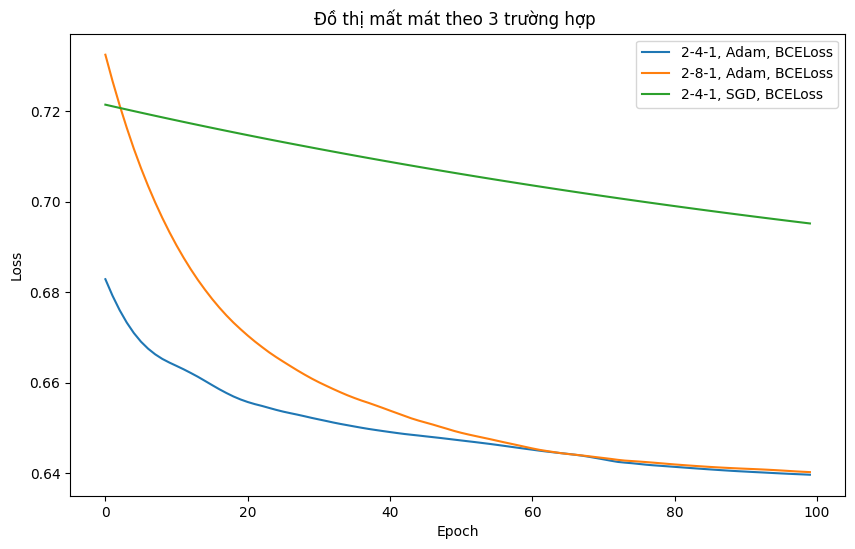

In [10]:
X_train = torch.randn(100, 2)  
y_train = torch.randint(0, 2, (100, 1)).float()  
X_test = torch.randn(20, 2)  
y_test = torch.randint(0, 2, (20, 1)).float()

class ANN(nn.Module):
    def __init__(self, hidden_size):
        super(ANN, self).__init__()
        self.fc1 = nn.Linear(2, hidden_size)  
        self.fc2 = nn.Linear(hidden_size, 1)  
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.sigmoid(self.fc2(x))
        return x

def train_model(model, criterion, optimizer, X_train, y_train, epochs=100):
    loss_history = []
    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()
        loss_history.append(loss.item())
    return loss_history

model_4_adam = ANN(hidden_size=4)
criterion = nn.BCELoss()
optimizer_adam = optim.Adam(model_4_adam.parameters(), lr=0.01)
loss_history_4_adam = train_model(model_4_adam, criterion, optimizer_adam, X_train, y_train)

model_8_adam = ANN(hidden_size=8)
optimizer_adam_8 = optim.Adam(model_8_adam.parameters(), lr=0.01)
loss_history_8_adam = train_model(model_8_adam, criterion, optimizer_adam_8, X_train, y_train)

model_4_sgd = ANN(hidden_size=4)
optimizer_sgd = optim.SGD(model_4_sgd.parameters(), lr=0.01)
loss_history_4_sgd = train_model(model_4_sgd, criterion, optimizer_sgd, X_train, y_train)

plt.figure(figsize=(10, 6))
plt.plot(loss_history_4_adam, label='2-4-1, Adam, BCELoss')
plt.plot(loss_history_8_adam, label='2-8-1, Adam, BCELoss')
plt.plot(loss_history_4_sgd, label='2-4-1, SGD, BCELoss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Đồ thị mất mát theo 3 trường hợp ')
plt.legend()
plt.show()

## Phần 3
**Câu hỏi**:  
   - Quan sát đồ thị:  
     - Mất mát giảm nhanh nhất ở trường hợp nào? Chậm nhất ở đâu?  
            - Trường hợp có mất mát giảm nhanh nhất là đường màu cam (2-8-1, Adam, BCELoss)
            - Trường hợp có mất mát giảm chậm nhất là đường màu xanh lá (2-4-1, SGD, BCELoss)
     - Có trường hợp nào mất mát không giảm đều không (dao động)? Giải thích tại sao.  
              - Có dao động nhỏ ở đường màu xanh dương (2-4-1, Adam, BCELoss) chủ yếu nằm ở các epoch đầu (0 - 20)
              .Giải thích: Dao động ở đường màu xanh dương là do sự kết hợp giữa cơ chế thích ứng của Adam và số lượng nơ-ron ẩn hạn chế, nhưng cũng không quá lớn và mất mát vẫn giảm ổn định về sau

